A simple application of PCA using the diabetes dataset in scikit-learn. We do some simple feature engineering using PCA and then train a linear regression model. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn import datasets

In [3]:
diabetes = datasets.load_diabetes(as_frame=True)

In [4]:
diabetes

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

We can use the ".DESCR" method on this dataset to learn more about its contents. As we can see below, column 11 is the target variable that we will be attempting to predict. 

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
X = diabetes.data
y = diabetes.target

In [7]:
X.shape, y.shape

((442, 10), (442,))

As we can see, we have 442 rows of data. Before training the linear regression model, let's do some EDA...

In [8]:
df = X.join(y)  # Full dataset including the target

In [9]:
df.head()  # Note that each of the input columns have been scaled appropriately. 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [11]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


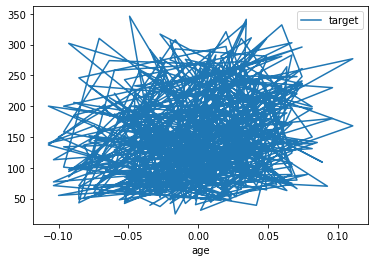

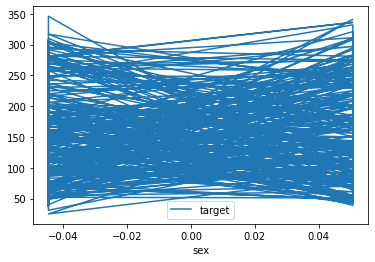

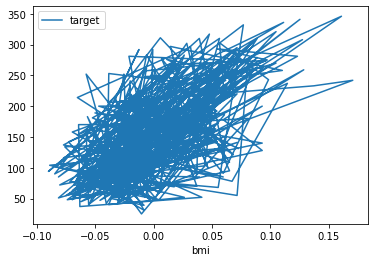

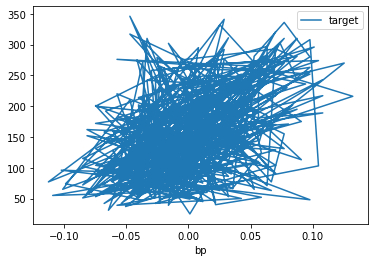

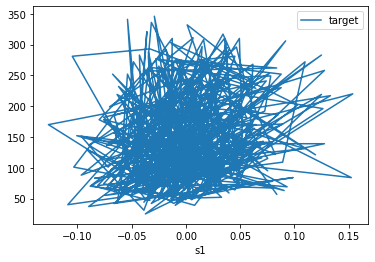

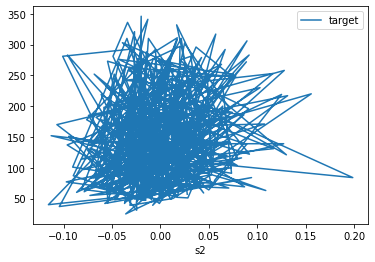

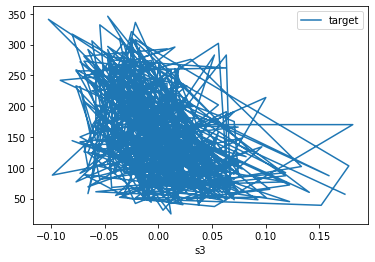

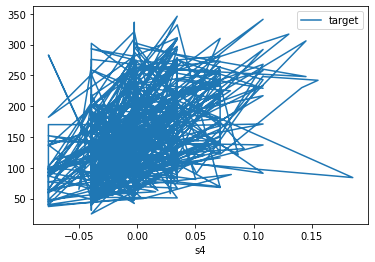

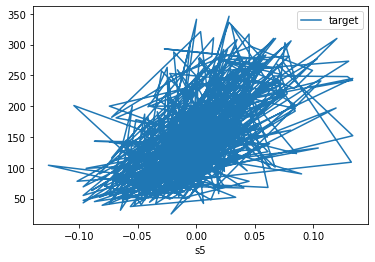

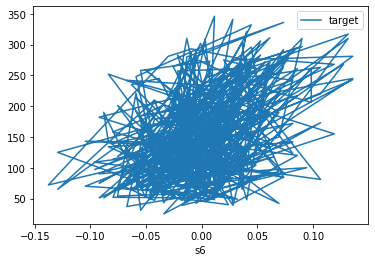

In [12]:
for i in range(10):
    df.plot(i, 10)

In [13]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


Looks like age, sex and bmi are fairly well correlated. Let's look at the mutual information scores to see what features are most well-correlated with the target.

In [14]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [15]:
mi_scores = make_mi_scores(X, y)
print(mi_scores)

bmi    0.171019
s5     0.143879
s4     0.113132
s6     0.105773
bp     0.066338
s3     0.064794
s1     0.062981
s2     0.015133
sex    0.014344
age    0.001068
Name: MI Scores, dtype: float64


The scores are more or less in line with the correlation matrix given above. It seems like around 6 features should be enough for our model. Let's use PCA to determine the best combination of features to use. 

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=6)
pca.fit_transform(X)

array([[ 0.02793062, -0.09260116,  0.02802696, -0.00393895, -0.01220663,
        -0.04809855],
       [-0.13468605,  0.06526341,  0.00132778, -0.02235559, -0.00681271,
        -0.04818421],
       [ 0.01294474, -0.07776417,  0.0351635 , -0.03764663, -0.05535734,
        -0.05293076],
       ...,
       [-0.00976257, -0.05733724,  0.02359604, -0.06437226, -0.00673933,
        -0.00215418],
       [ 0.03295629,  0.00999424, -0.04132126,  0.07690284,  0.00569113,
        -0.02648904],
       [-0.09056089,  0.18910814, -0.00230125, -0.01049342,  0.02853071,
         0.07834495]])

In [18]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)

[0.40242142 0.14923182 0.12059623 0.09554764 0.06621856 0.06027192]
[2.00604441 1.22160478 1.09816315 0.97748473 0.81374786 0.77634993]
[[ 0.21643101  0.18696711  0.3031625   0.2717397   0.34325493  0.35186062
  -0.28243639  0.42883325  0.37861731  0.32218282]
 [ 0.04437151 -0.38654811 -0.15628061 -0.13825564  0.57302669  0.45593985
   0.50624287 -0.06818423 -0.0261893  -0.0849466 ]
 [ 0.49466811 -0.10685833  0.1675317   0.51356804 -0.0685867  -0.26969438
   0.38602787 -0.38068121  0.0636315   0.27684271]
 [-0.4140095  -0.67986052  0.49982533 -0.01966734 -0.06839533 -0.16777384
  -0.07602005  0.0079212   0.26442742  0.08708624]
 [-0.68686389  0.37345612  0.12935936  0.48689014  0.12917415  0.11673143
   0.24499115 -0.14364377 -0.1516611   0.03138792]
 [-0.2258505   0.04173103 -0.4031419  -0.27276274  0.00540864 -0.1332572
   0.1063716  -0.0339454   0.17873005  0.80506447]]


In [19]:
pca.components_[0]

array([ 0.21643101,  0.18696711,  0.3031625 ,  0.2717397 ,  0.34325493,
        0.35186062, -0.28243639,  0.42883325,  0.37861731,  0.32218282])

In [20]:
X_cols = X.columns

In [21]:
import matplotlib.pyplot as plt

Let's visualise these components in terms of the original features:

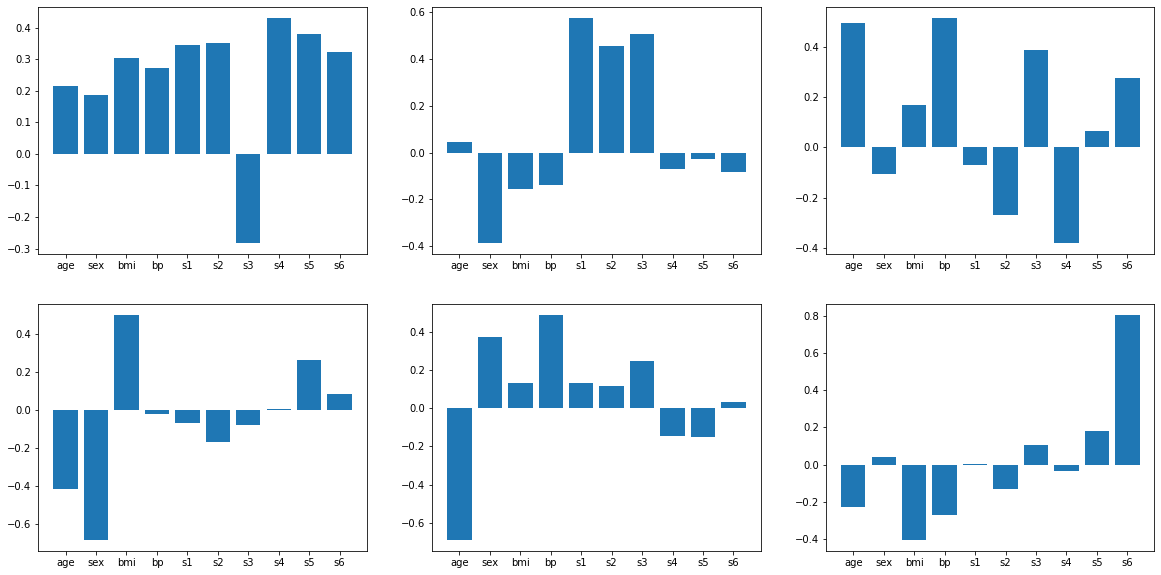

In [22]:
fig, ax = plt.subplots(2,3, figsize=(20,10))

for i in range(3):
    ax[0,i].bar(X_cols, pca.components_[i])
for i in range(3):
    ax[1,i].bar(X_cols, pca.components_[i+3])

In [23]:
pca1 = pd.Series(len(X)*[0])
for i in range(10):
    pca1=np.add(pca1, X[X_cols[i]]*(pca.components_[0][i]))

pca2 = pd.Series(len(X)*[0])
for i in range(10):
    pca2=np.add(pca2, X[X_cols[i]]*(pca.components_[1][i]))

pca3 = pd.Series(len(X)*[0])
for i in range(10):
    pca3=np.add(pca3, X[X_cols[i]]*(pca.components_[2][i]))
    
pca4 = pd.Series(len(X)*[0])
for i in range(10):
    pca4=np.add(pca4, X[X_cols[i]]*(pca.components_[3][i]))

pca5 = pd.Series(len(X)*[0])
for i in range(10):
    pca5=np.add(pca5, X[X_cols[i]]*(pca.components_[4][i]))
    
pca6 = pd.Series(len(X)*[0])
for i in range(10):
    pca6=np.add(pca6, X[X_cols[i]]*(pca.components_[1][5]))

In [24]:
X_pca = X
X_pca["pca1"] = pca1
X_pca["pca2"] = pca2
X_pca["pca3"] = pca3
X_pca["pca4"] = pca4
X_pca["pca5"] = pca5
X_pca["pca6"] = pca6

X_pca = X_pca.drop(columns=X_cols)

In [25]:
X_pca.head()

,pca1,pca2,pca3,pca4,pca5,pca6
0,0.027931,-0.092601,0.028027,-0.003939,-0.012207,0.022592
1,-0.134686,0.065263,0.001328,-0.022356,-0.006813,-0.126548
2,0.012945,-0.077764,0.035164,-0.037647,-0.055357,0.016847
3,0.002345,0.018182,-0.095750,0.065318,0.012154,-0.060719
4,-0.035981,0.038621,-0.002724,-0.006541,-0.006343,-0.048933


In [26]:
df2 = X_pca.join(y)
df2.head()

,pca1,pca2,pca3,pca4,pca5,pca6,target
0,0.027931,-0.092601,0.028027,-0.003939,-0.012207,0.022592,151.0
1,-0.134686,0.065263,0.001328,-0.022356,-0.006813,-0.126548,75.0
2,0.012945,-0.077764,0.035164,-0.037647,-0.055357,0.016847,141.0
3,0.002345,0.018182,-0.095750,0.065318,0.012154,-0.060719,206.0
4,-0.035981,0.038621,-0.002724,-0.006541,-0.006343,-0.048933,135.0


Let's now begin the model training. First we will split the data into train and test sets:

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

In [29]:
X_train.shape, y_train.shape

((353, 6), (353,))

In [30]:
X_test.shape, y_test.shape

((89, 6), (89,))

Now we can define and train the regression model:

In [31]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Let's now analyse the accuracy of the predictions:

In [33]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [ 400.2624324  -269.67191837  227.18357201  587.45290394 -114.15030166
   60.07194306]
Intercept: 152.5400255505919
Mean squared error (MSE): 3221.81
Coefficient of determination (R^2): 0.51


Let's plot the predicted values against the actual values to see visually how good the fit is:

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target'>

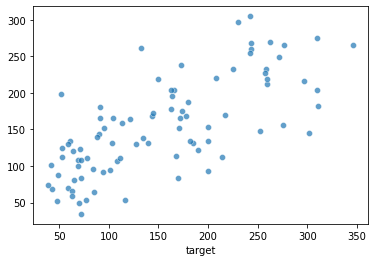

In [34]:
sns.scatterplot(y_test, y_pred, alpha=0.7)

We see that there is a general upward slope which is roughly symmetric between both axes, as hoped. Let's try using a ridge regression model to see if that helps:

Coefficients: [ 256.02635711 -222.27837205  132.10760867  393.52585324  -78.36397191
  150.36670748]
Intercept: 152.15871829016805
Mean squared error (MSE): 3349.39
Coefficient of determination (R^2): 0.49


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target'>

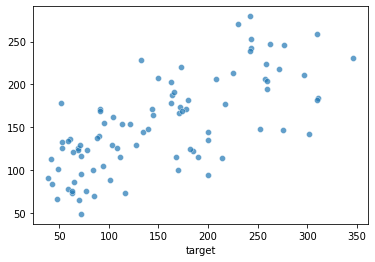

In [35]:
model2 = linear_model.Ridge(alpha=0.4)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print('Coefficients:', model2.coef_)
print('Intercept:', model2.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred2))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred2))

sns.scatterplot(y_test, y_pred2, alpha=0.7)

With an alpha of 0.4, we see that the error is actually around the same, or even slightly worse, than the simple linear regression. Thus, there doesn't seem to be any issue with overfitting here and the linear model without regularisation is sufficient. 